# **Maestría en Ciencia de los Datos**

# **Métodos Matemáticos para el Análisis de Datos**


**Presentan:**

*   220481261 - Alonso Soria Mónica
*   398813438 - Lomelí Avila Afra Julieta
*   220981202 - Martínez Ayala Pedro

**Temas asignados:**

1. Solucionar un problema de matrices de Wassily Leontief.
2. Solucionar un problema de programación lineal (método gráfico).
3. Solucionar un problema con aplicación de una ecuación diferencial homogénea.



```
# This is formatted as code
```

# Bibliotecas

In [ ]:
#Pulp para Optimización

pip install -U "scipy==1.4.*" "pulp==2.1"

In [ ]:
#Scipy, Numpy, Matplotlib

from scipy.optimize import linprog
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Problema 2. Programación Lineal - Método gráfico

Una fábica de joyería elabora y vende pulseras y collares, las cuales elabora con pequeñas piedras de diferentes colores: rojo, negro y amarillo, y aunque también utiliza otros materiales, estas piedras son fundamentales para realizar sus diseños. Las pulseras utilizan 6 piedras de color rojo, 12 piedras de color negro y 4 de color amarillo, mientras que los collares utilizan 12 piedras de color rojo, 30 piedras de color negro y 12 de color amarillo. Las piedras se compran en un poblado cercano a la ciudad donde se encuentra la fábrica, por lo que la disponibilidad del material es fundamental para planear la producción. El inventario actual para trabajar esta semana es de: 396 de color rojo, 816 de color negro y 312 de color amarillo.

Cada piedra de color roja cuesta \$3.00, las negras \$1.00 y las piedras amarillas \$2.00. El tiempo también es un factor importante a considerar. Se invierten 20 minutos en la elaboración de cada pulsera y 30 minutos por cada collar y dispone de 20 horas semanales, es decir, 1200 minutos.

Los costos de otros materiales y piedras representan un costo de \$10.00 para las pulseras y \$15.00 para los collares. Finalmente considera que las pulseras se venden en \$85.00 y los collares en \$185.00
¿Cuántos collares y pulseras deben fabricarse para maximizar la utilidad?


$$Utilidad = Precio venta - Costo (piedras + otros materiales)$$ 

$$Utilidad pulsera = $85 - $48 = $37$$

$$Utilidad collar = $185 - $105 = $80$$







Tabla de datos

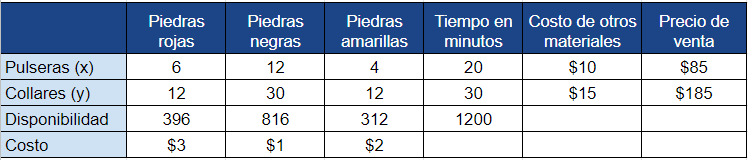

Definición del problema de programación lineal \\

Función Objetivo: 
$$Z= Max (37x + 80y)$$ \\
Restricciones: $$6x+12y <= 396$$ \\
               $$12x + 30y <=816$$ \\
               $$4x + 12y <= 312$$ \\
               $$20x + 30y <= 1200$$ \\
No negatividad: $$x,y >= 0$$

**NOTA:** Dado que linprog() resuelve solamente problemas de minización, debemos minimizar el negativo de la función objetivo, para asi obtener como resultado la maximización de la función. \\

Nuevo sistema: \\
Función Objetivo: $$Z= Min(-37x - 80y)$$ \\
Restricciones: \\
               $$6x+12y <= 396$$ \\
               $$12x + 30y <=816$$ \\
               $$4x + 12y <= 312$$ \\
               $$20x + 30y <= 1200$$ \\
No negatividad: $$x,y >= 0$$

In [ ]:
# Coeficientes de la función objetivo
# Aqui se definen los coeficientes "x" y "y" de la función objetivo
obj = [-37, -80]

lhs_ineq = [[ 6,  12],  [12,  30],  [ 4, 12],  [ 20, 30]]

rhs_ineq = [396,  816,  312,  1200]  

#Añadimos no negatividad (de cero a infinito)
bnd = [(0, float("inf")),(0, float("inf"))] 

In [ ]:
# Ingresamos los argumentos para la función lingpro

opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq, bounds=bnd, method="revised simplex")
opt

     con: array([], dtype=float64)
     fun: -2416.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([ 1.20000000e+01, -1.13686838e-13,  2.40000000e+01,  0.00000000e+00])
  status: 0
 success: True
       x: array([48.,  8.])

In [ ]:
# Obtenemos el punto en que la utilidad se maximiza

opt.fun

opt.success

opt.x

array([48.,  8.])

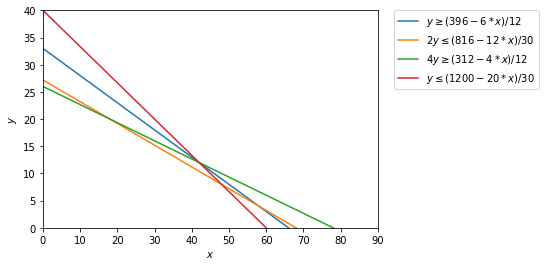

In [ ]:
# Construcción del gráfico
# x > 0
# vector (inicio, salto, fin)
x = np.linspace(0, 100, 2000)


# Construímos las rectas de las restricciones 

#6x+12y <= 396 , y <= (396 -6*x)/12
y1= (396 -6*x)/12

#12x + 30y <=816 , y<= (816 -12*x)/30
y2= (816 -12*x)/30

#4x + 12y <= 312, y<= (312-4*x)/12
y3= (312-4*x)/12

#20x + 30y <= 1200, y <= (1200-20*x)/30
y4= (1200-20*x)/30

# Graficar
plt.plot(x, y1, label=r'$y\geq(396 -6*x)/12$')
plt.plot(x, y2, label=r'$2y\leq(816 -12*x)/30$')
plt.plot(x, y3, label=r'$4y\geq (312-4*x)/12$')
plt.plot(x, y4, label=r'$y\leq (1200-20*x)/30$')
plt.xlim((0, 90)) #límite eje x
plt.ylim((0, 40)) #límite eje y
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

# Región Factible, en este caso es un punto el que maximiza la utilidad (48,8) 
# por lo que la solución no es una región, sino el punto en sí mismo.
y5 = np.minimum(y2, y4)
y6 = np.maximum(y1, y3)
plt.fill_between(x, y5, y6, where=y5>y6, color='grey', alpha=0.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

# Problema 3. Ecuaciones Diferenciales Homogéneas

Definimos la ecuación homogénea de primer orden que queremos resolver

 $$\frac{dy}{dx}= -ky$$ \\

Con condición inicial de $$y(x=0)=5$$ \\


Comprobamos que tenga la forma $$M(x,y)dx + N(x,y)dy = 0$$ \\

Después la despejamos para ver si se adapta a la fórmula \\
 
$$dy + dx(ky) = 0$$ \\
 
Comprobamos que sí cumple con la forma de la ecuación diferencial homogénea de primer orden \\




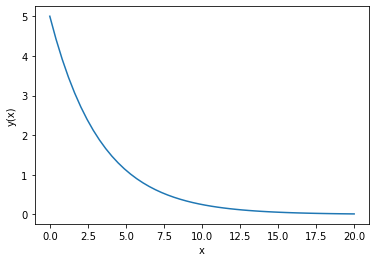

In [ ]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Función regresa dy/dx
def model(y,x):
    k = 0.3
    dydx = -k * y
    return dydx

# Condición inicial
y0 = 5

# Puntos de x
x = np.linspace(0,20)

# Resolver la ODE
y = odeint(model,y0,x)

# Plot resultados
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()